In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect
import datetime as dt

In [2]:
#import data for April, May, and June for each year from 2015 - 2021 from MTA Database into SQL database
#2015 was apparent limit for this pull
#!python get_mta.py "[1-2][0-9]0[4-6] 

#UPDATE: data pull was too large for computer to handle. Reduced to April, May, and June for 2021

In [3]:
#view and inspect mta_data.db with SQLAlchemy
engine = create_engine("sqlite:///mta_data.db")
insp = inspect(engine)

In [4]:
print(insp.get_table_names())
pd.read_sql('SELECT COUNT(exits) FROM mta_data LIMIT 30;', engine)

['mta_data']


,COUNT(exits)
0,2720549


In [5]:
#find number of distinct stations 
pd.read_sql('SELECT COUNT(DISTINCT(STATION))FROM mta_data;', engine)

,COUNT(DISTINCT(STATION))
0,379


In [6]:
#look for duplicate turnstile entries on same date and time (to be explored and dealt with in pandas later)
pd.read_sql('SELECT "C/A",UNIT, SCP, STATION, DATE, TIME, COUNT(ENTRIES)FROM mta_data GROUP BY  "C/A",UNIT, SCP, STATION, DATE, TIME HAVING COUNT(ENTRIES) >1 ORDER BY COUNT(ENTRIES) DESC;', engine)

,C/A,UNIT,SCP,STATION,DATE,TIME,COUNT(ENTRIES)
0,B024,R211,00-05-00,KINGS HWY,05/01/2021,00:00:00,2
1,B024,R211,00-05-00,KINGS HWY,05/01/2021,08:00:00,2
2,B024,R211,00-05-00,KINGS HWY,05/01/2021,12:00:00,2
3,B024,R211,00-05-00,KINGS HWY,05/01/2021,16:00:00,2
4,B024,R211,00-05-00,KINGS HWY,05/01/2021,20:00:00,2
5,B024,R211,00-05-00,KINGS HWY,05/02/2021,00:00:00,2
6,B024,R211,00-05-00,KINGS HWY,05/02/2021,04:00:00,2
7,B024,R211,00-05-00,KINGS HWY,05/02/2021,08:00:00,2
8,B024,R211,00-05-00,KINGS HWY,05/02/2021,12:00:00,2
9,B024,R211,00-05-00,KINGS HWY,05/02/2021,16:00:00,2


In [7]:
#more of a question of curiosity here - are time stamp intervals consistent for entries?
#short answer is no
#look for number of unique time stampes per day for REGULAR turnstile entries and sort by desc
pd.read_sql('SELECT "C/A",UNIT, SCP, STATION, DATE, COUNT(DISTINCT(TIME)) as Unique_Times FROM mta_data WHERE "DESC" == "REGULAR" GROUP BY  "C/A",UNIT, SCP, STATION, DATE ORDER BY Unique_Times DESC LIMIT 15;', engine)

,C/A,UNIT,SCP,STATION,DATE,Unique_Times
0,E003,R369,00-00-00,FT HAMILTON PKY,05/04/2021,34
1,E003,R369,00-00-01,FT HAMILTON PKY,05/04/2021,34
2,E003,R369,00-00-02,FT HAMILTON PKY,05/04/2021,34
3,E003,R369,00-03-00,FT HAMILTON PKY,05/04/2021,34
4,E003,R369,00-03-01,FT HAMILTON PKY,05/04/2021,34
5,E003,R369,00-05-00,FT HAMILTON PKY,05/04/2021,34
6,E003,R369,00-05-01,FT HAMILTON PKY,05/04/2021,34
7,R627,R063,00-00-00,SUTTER AV-RUTLD,06/15/2021,28
8,R627,R063,00-00-01,SUTTER AV-RUTLD,06/15/2021,28
9,R627,R063,00-00-02,SUTTER AV-RUTLD,06/15/2021,28


In [8]:
#now look at all non 'REGULAR' entries for unique time intervals.
#assuming basis of 0-4, 4-8, etc, each turnstile should have 6 time intervals per day

#UPDATE - this analysis was not used in the end, as turnstile times were done by day and then regrouped into 
#         2 hour interval bins for the hourly analysis
pd.read_sql('SELECT "C/A",UNIT, SCP, STATION, DATE, COUNT(DISTINCT(TIME)) as Unique_Times FROM mta_data WHERE "DESC" != "REGULAR" GROUP BY  "C/A",UNIT, SCP, STATION, DATE ORDER BY Unique_Times DESC LIMIT 15;', engine)

,C/A,UNIT,SCP,STATION,DATE,Unique_Times
0,N700,R570,00-00-00,72 ST-2 AVE,05/04/2021,7
1,B023,R211,01-05-00,KINGS HWY,04/18/2021,6
2,B023,R211,01-05-01,KINGS HWY,04/18/2021,6
3,B023,R211,01-06-00,KINGS HWY,04/18/2021,6
4,B023,R211,01-06-01,KINGS HWY,04/18/2021,6
5,B023,R211,01-06-02,KINGS HWY,04/18/2021,6
6,B024,R211,00-00-00,KINGS HWY,04/18/2021,6
7,B024,R211,00-00-01,KINGS HWY,04/18/2021,6
8,B024,R211,00-00-02,KINGS HWY,04/18/2021,6
9,B024,R211,00-00-03,KINGS HWY,04/18/2021,6


In [9]:
#sizing down huge data set to only include covid months in 2021. WIll be more representative of a COVID era. 
mta_df = pd.read_sql('SELECT * FROM mta_data;',engine)

In [10]:
#add new date_time column formatted as datetime for use in sorting and analysis later
mta_df["DATE_TIME"] = pd.to_datetime(mta_df.DATE + " " + mta_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
mta_df['DATE'] = pd.to_datetime(mta_df.DATE)

In [11]:
#sanity check dataframe after new column added
#show counts to begin data cleanup by looking for nulls
mta_df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720549 entries, 0 to 2720548
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   C/A        2720549 non-null  object        
 1   UNIT       2720549 non-null  object        
 2   SCP        2720549 non-null  object        
 3   STATION    2720549 non-null  object        
 4   LINENAME   2720549 non-null  object        
 5   DIVISION   2720549 non-null  object        
 6   DATE       2720549 non-null  datetime64[ns]
 7   TIME       2720549 non-null  object        
 8   DESC       2720549 non-null  object        
 9   ENTRIES    2720549 non-null  int64         
 10  EXITS      2720549 non-null  int64         
 11  DATE_TIME  2720549 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 249.1+ MB


In [12]:
#look for duplicate turnstiles
mta_df.head()

turn_gp = ['C/A','UNIT','SCP','STATION','DATE_TIME']
temp_df = mta_df.groupby(turn_gp).ENTRIES.count().reset_index().sort_values('ENTRIES', ascending = False)
print(temp_df.shape)
temp_df[(temp_df['ENTRIES']> 1)].shape

(2720494, 6)


(55, 6)

In [13]:
#look at first duplicate as example
turn_mask = ((mta_df['C/A'] == 'B024') & (mta_df['UNIT'] == 'R211' )& (mta_df['SCP']== '00-05-00') & 
            ( mta_df['STATION']=='KINGS HWY')& (mta_df['DATE_TIME']=='2021-05-01 12:00:00'))
mta_df[turn_mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1482684,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-01,12:00:00,REGULAR,262152,0,2021-05-01 12:00:00
1482685,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-01,12:00:00,RECOVR AUD,12,0,2021-05-01 12:00:00


In [14]:
#from above there are only 55 duplicates, checking if they are all RECOVR AUD
mta_df[(mta_df['DESC'] != 'REGULAR')]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
13152,A083,R125,00-00-00,BROAD ST,JZ,BMT,2021-06-23,21:00:00,RECOVR AUD,6033908,2206280,2021-06-23 21:00:00
13153,A083,R125,00-00-00,BROAD ST,JZ,BMT,2021-06-24,01:00:00,RECOVR AUD,6033921,2206284,2021-06-24 01:00:00
13154,A083,R125,00-00-00,BROAD ST,JZ,BMT,2021-06-24,05:00:00,RECOVR AUD,6033921,2206288,2021-06-24 05:00:00
13194,A083,R125,00-00-01,BROAD ST,JZ,BMT,2021-06-23,21:00:00,RECOVR AUD,743782,376915,2021-06-23 21:00:00
13195,A083,R125,00-00-01,BROAD ST,JZ,BMT,2021-06-24,01:00:00,RECOVR AUD,743788,376920,2021-06-24 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2718329,R728,R226,00-05-00,GUN HILL RD,5,IRT,2021-04-01,12:00:00,RECOVR AUD,10,0,2021-04-01 12:00:00
2718330,R728,R226,00-05-00,GUN HILL RD,5,IRT,2021-04-01,16:00:00,RECOVR AUD,10,0,2021-04-01 16:00:00
2718357,R728,R226,00-05-01,GUN HILL RD,5,IRT,2021-03-30,04:00:00,RECOVR AUD,0,12,2021-03-30 04:00:00
2718371,R728,R226,00-05-01,GUN HILL RD,5,IRT,2021-04-01,12:00:00,RECOVR AUD,0,12,2021-04-01 12:00:00


In [15]:
#remove all 55 duplicates 
mta_df.sort_values(turn_gp, ascending = False, inplace = True)
turn_mask = ((mta_df['C/A'] == 'B024') & (mta_df['UNIT'] == 'R211' )& (mta_df['SCP']== '00-05-00') & 
             ( mta_df['STATION']=='KINGS HWY')& (mta_df['DATE_TIME']=='2021-05-01 12:00:00'))
mta_df[turn_mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
1482684,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-01,12:00:00,REGULAR,262152,0,2021-05-01 12:00:00
1482685,B024,R211,00-05-00,KINGS HWY,BQ,BMT,2021-05-01,12:00:00,RECOVR AUD,12,0,2021-05-01 12:00:00


In [16]:
#because all RECOVR AUD should be second now, drop duplicates with first being kept
mta_df.drop_duplicates(subset=turn_gp, inplace=True)
#sanity check that duplicates are gone
print(mta_df.shape)
mta_df.groupby(turn_gp).ENTRIES.count().reset_index().sort_values('ENTRIES', ascending = False).head()

(2720494, 12)


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-03-27 00:00:00,1
1813655,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 10:00:00,1
1813657,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 18:00:00,1
1813658,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 22:00:00,1
1813659,R138,R293,00-05-00,34 ST-PENN STA,2021-05-02 02:00:00,1


In [17]:
#checking columns for whitespace and other erros
mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [18]:
mta_df.DESC.unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

In [19]:
#calculate the entries for a each 4 hour period
mta_hourly_df = (mta_df.groupby(turn_gp, as_index = False).ENTRIES.first())
#mta_hourly_df = mta_hourly_df.sort_values(by = turn_gp, ascending = True)
mta_hourly_df.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-03-27 00:00:00,7550517
1,A002,R051,02-00-00,59 ST,2021-03-27 04:00:00,7550517
2,A002,R051,02-00-00,59 ST,2021-03-27 08:00:00,7550517
3,A002,R051,02-00-00,59 ST,2021-03-27 12:00:00,7550517
4,A002,R051,02-00-00,59 ST,2021-03-27 16:00:00,7550517


In [20]:
mta_hourly_df['NEW_ENTRIES']  = mta_hourly_df.ENTRIES.diff()
mta_hourly_df.describe()

,ENTRIES,NEW_ENTRIES
count,2.720494e+06,2.720493e+06
mean,4.186374e+07,-2.773381e+00
std,2.185461e+08,1.313114e+07
min,0.000000e+00,-2.144334e+09
25%,2.170002e+05,2.000000e+00
50%,1.434413e+06,2.300000e+01
75%,6.064291e+06,7.600000e+01
max,2.147432e+09,2.139010e+09


In [21]:
#modify NEW_ENTRIES to correct negative calcs and turnstile changes
max_obs = 100000
mta_hourly_df['NEW_ENTRIES'] = mta_hourly_df.NEW_ENTRIES.apply(lambda x: abs(x))
mta_hourly_df = mta_hourly_df[(mta_hourly_df['NEW_ENTRIES'] < max_obs)]
print(mta_hourly_df.NEW_ENTRIES.describe())
mta_hourly_df.head()

count    2.715947e+06
mean     6.569258e+01
std      7.444774e+02
min      0.000000e+00
25%      3.000000e+00
50%      2.400000e+01
75%      7.700000e+01
max      9.970300e+04
Name: NEW_ENTRIES, dtype: float64


,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,NEW_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-03-27 04:00:00,7550517,0.0
2,A002,R051,02-00-00,59 ST,2021-03-27 08:00:00,7550517,0.0
3,A002,R051,02-00-00,59 ST,2021-03-27 12:00:00,7550517,0.0
4,A002,R051,02-00-00,59 ST,2021-03-27 16:00:00,7550517,0.0
5,A002,R051,02-00-00,59 ST,2021-03-27 20:00:00,7550517,0.0


In [22]:
#create dailys table
turn_gp_daily = ['C/A','UNIT','SCP','STATION','DATE']
mta_daily_df = (mta_df.groupby(turn_gp_daily, as_index = False).ENTRIES.first())
#mta_daily_df = mta_daily_df.sort_values(by = turn_gp_daily, ascending = True)
mta_daily_df['NEW_ENTRIES']  = mta_daily_df.ENTRIES.diff()
print(mta_daily_df.NEW_ENTRIES.describe())
mta_daily_df['NEW_ENTRIES'] = mta_daily_df.NEW_ENTRIES.apply(lambda x: abs(x))
mta_daily_df = mta_daily_df[(mta_daily_df['NEW_ENTRIES'] < max_obs)]
print(mta_daily_df.NEW_ENTRIES.describe())
mta_daily_df.head()

count    4.543220e+05
mean    -1.660708e+01
std      3.213235e+07
min     -2.144334e+09
25%      6.800000e+01
50%      2.390000e+02
75%      4.880000e+02
max      2.139011e+09
Name: NEW_ENTRIES, dtype: float64
count    449846.000000
mean        392.212535
std        1824.718208
min           0.000000
25%          76.000000
50%         244.000000
75%         492.000000
max       99744.000000
Name: NEW_ENTRIES, dtype: float64


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,NEW_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-03-28,7550675,158.0
2,A002,R051,02-00-00,59 ST,2021-03-29,7551178,503.0
3,A002,R051,02-00-00,59 ST,2021-03-30,7551731,553.0
4,A002,R051,02-00-00,59 ST,2021-03-31,7552051,320.0
5,A002,R051,02-00-00,59 ST,2021-04-01,7552051,0.0


In [23]:
#create dailys table for stations
station_daily = mta_daily_df.groupby(["STATION", "DATE"])[['NEW_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,NEW_ENTRIES
0,1 AV,2021-03-27,406226.0
1,1 AV,2021-03-28,3750.0
2,1 AV,2021-03-29,5494.0
3,1 AV,2021-03-30,6603.0
4,1 AV,2021-03-31,6544.0


In [24]:
#create average dailys table for all stations
station_daily_avg = station_daily.groupby(["STATION"])[['NEW_ENTRIES']].mean().reset_index().sort_values('NEW_ENTRIES', ascending=False)
station_daily_avg.head(10)

,STATION,NEW_ENTRIES
61,34 ST-PENN STA,41450.252747
59,34 ST-HERALD SQ,31827.450549
110,86 ST,30519.274725
315,PATH NEW WTC,29494.461538
233,GRD CNTRL-42 ST,29075.483516
14,14 ST-UNION SQ,27507.131868
9,125 ST,26993.766667
46,23 ST,26133.010989
68,42 ST-PORT AUTH,25397.560440
85,59 ST,21823.351648


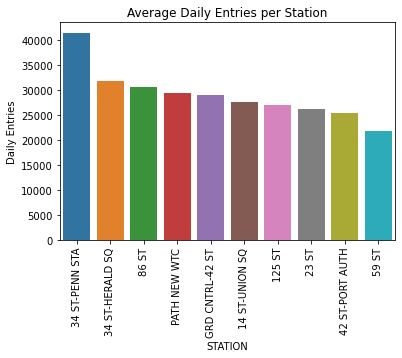

In [25]:
#plot 10 busiest stations 
sns.barplot(x = 'STATION',y='NEW_ENTRIES',data=station_daily_avg.head(10));
plt.ylabel('Daily Entries');
plt.xticks(rotation=90);
plt.title('Average Daily Entries per Station');

Text(0.5, 1.0, 'Top 5 Station Daily Entries 4/21-6/26')

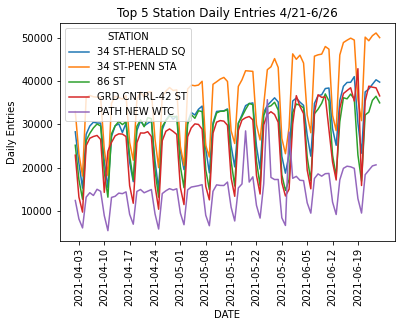

In [26]:
top_mask = list(station_daily_avg.head(10).iloc[:5,0])
top_df = station_daily[station_daily['STATION'].isin(top_mask)]
top_df = top_df[(top_df['DATE'] > '2021-04-01') & (top_df['NEW_ENTRIES'] < 60000)]
x_label = list(station_daily['DATE'].unique()[7::7])
sns.lineplot(x='DATE', y= 'NEW_ENTRIES', hue = 'STATION', data = top_df);
plt.dpi = 500
plt.xticks(x_label,rotation = 90);
plt.ylabel('Daily Entries')
plt.title('Top 5 Station Daily Entries 4/21-6/26')

In [27]:
#next we evaluate the best days to visit each of the stations
top_df['DAY_OF_WEEK'] = top_df['DATE'].dt.dayofweek
top_df

,STATION,DATE,NEW_ENTRIES,DAY_OF_WEEK
5342,34 ST-HERALD SQ,2021-04-02,28269.0,4
5343,34 ST-HERALD SQ,2021-04-03,21021.0,5
5344,34 ST-HERALD SQ,2021-04-04,15281.0,6
5345,34 ST-HERALD SQ,2021-04-05,27700.0,0
5346,34 ST-HERALD SQ,2021-04-06,29609.0,1
...,...,...,...,...
28546,PATH NEW WTC,2021-06-19,12849.0,5
28547,PATH NEW WTC,2021-06-20,9520.0,6
28548,PATH NEW WTC,2021-06-21,18374.0,0
28550,PATH NEW WTC,2021-06-23,20407.0,2


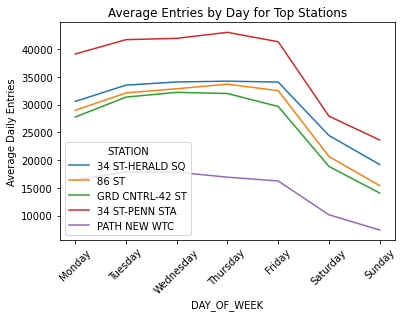

In [28]:
sns.lineplot(x='DAY_OF_WEEK', y= 'NEW_ENTRIES', hue = 'STATION', data = top_df.groupby(['STATION','DAY_OF_WEEK'], 
                            as_index = False).NEW_ENTRIES.mean().sort_values('DAY_OF_WEEK',ascending = True));
plt.xticks(np.arange(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 45);
plt.ylabel('Average Daily Entries');
plt.title('Average Entries by Day for Top Stations');

In [29]:
#create new timeseries to filter hourly data below
mta_hourly_df['DAY_OF_WEEK'] = mta_hourly_df['DATE_TIME'].dt.dayofweek
mta_hourly_df['TIME'] = mta_hourly_df['DATE_TIME'].dt.time
mta_hourly_df['DATE'] = mta_hourly_df['DATE_TIME'].dt.date

In [30]:
#custom function to create time blocks, MTA data was messy and had numerous time intervals so necessary to regroup them
midnight, four, eight, noon, sixteen, twenty, eod = dt.time(0,0), dt.time(4,0), dt.time(8,0), dt.time(12,0), dt.time(16,0), dt.time(20,0), dt.time(23,59,59)
two , six, ten, fourteen, eighteen, twentytwo = dt.time(2,0), dt.time(6,0), dt.time(10,0), dt.time(14,0), dt.time(18,0), dt.time(22,0)

block_list = []
for time in mta_hourly_df.TIME:
    if (time >= midnight) and (time < two):
        block_list.append('02:00')
    if (time >= two)and (time < four):
        block_list.append('04:00')
    if (time >= four)and (time < six):
        block_list.append('06:00')
    if (time >= six) and (time < eight):
        block_list.append('08:00')
    if (time >= eight)and (time < ten):
        block_list.append('10:00')
    if (time >= ten) and (time < noon):
        block_list.append('12:00')
    if (time >= noon) and (time < fourteen):
        block_list.append('14:00')
    if (time >= fourteen)and (time < sixteen):
        block_list.append('16:00')
    if (time >= sixteen)and (time < eighteen):
        block_list.append('18:00')
    if (time >= eighteen) and (time < twenty):
        block_list.append('20:00')
    if (time >= twenty)and (time < twentytwo):
        block_list.append('22:00')
    if (time >= twentytwo) and (time <= eod):
        block_list.append('24:00')
        
mta_hourly_df['TIME_BLOCK'] = block_list
mta_hourly_df

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES,NEW_ENTRIES,DAY_OF_WEEK,TIME,DATE,TIME_BLOCK
1,A002,R051,02-00-00,59 ST,2021-03-27 04:00:00,7550517,0.0,5,04:00:00,2021-03-27,06:00
2,A002,R051,02-00-00,59 ST,2021-03-27 08:00:00,7550517,0.0,5,08:00:00,2021-03-27,10:00
3,A002,R051,02-00-00,59 ST,2021-03-27 12:00:00,7550517,0.0,5,12:00:00,2021-03-27,14:00
4,A002,R051,02-00-00,59 ST,2021-03-27 16:00:00,7550517,0.0,5,16:00:00,2021-03-27,18:00
5,A002,R051,02-00-00,59 ST,2021-03-27 20:00:00,7550517,0.0,5,20:00:00,2021-03-27,22:00
...,...,...,...,...,...,...,...,...,...,...,...
2720489,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-25 05:00:00,5554,0.0,4,05:00:00,2021-06-25,06:00
2720490,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-25 09:00:00,5554,0.0,4,09:00:00,2021-06-25,10:00
2720491,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-25 13:00:00,5554,0.0,4,13:00:00,2021-06-25,14:00
2720492,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-06-25 17:00:00,5554,0.0,4,17:00:00,2021-06-25,18:00


In [31]:
#create top_hourly_df for daily time series of entries on weekdays
top_hourly_df = mta_hourly_df[mta_hourly_df['STATION'].isin(top_mask)]
top_hourly_df = top_hourly_df.groupby(['STATION','DATE','DAY_OF_WEEK','TIME_BLOCK']).NEW_ENTRIES.sum().reset_index().sort_values(['TIME_BLOCK'])
top_hourly_df = top_hourly_df[top_hourly_df['DAY_OF_WEEK'].isin([0,1,2,3,4])]

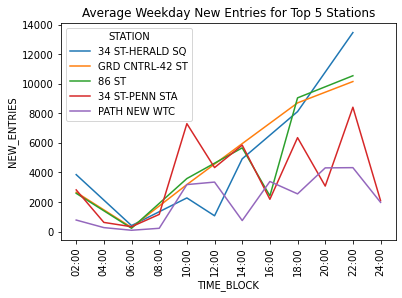

In [32]:
#use top_hourly_df to plot time series of new entries over 2 hour intverals averaged over weekdays for top 5 busy stations
sns.lineplot(x='TIME_BLOCK', y= 'NEW_ENTRIES', hue='STATION', data = top_hourly_df, ci=None);
plt.xticks(rotation=90);
plt.title('Average Weekday New Entries for Top 5 Stations');